In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats as ss
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df_rw = pd.read_excel("DS - Assignment Part 1 data set.xlsx")

In [3]:
df_rw.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
y = df_rw["House price of unit area"]
df = df_rw.drop(["Transaction date","House price of unit area"],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   House Age                                 414 non-null    float64
 1   Distance from nearest Metro station (km)  414 non-null    float64
 2   Number of convenience stores              414 non-null    int64  
 3   latitude                                  414 non-null    float64
 4   longitude                                 414 non-null    float64
 5   Number of bedrooms                        414 non-null    int64  
 6   House size (sqft)                         414 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 22.8 KB


In [6]:
df.describe()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845
std,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269
min,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000


In [7]:
X = df

In [8]:
X.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,32.0,84.87882,10,24.98298,121.54024,1,575
1,19.5,306.59470,9,24.98034,121.53951,2,1240
2,13.3,561.98450,5,24.98746,121.54391,3,1060
3,13.3,561.98450,5,24.98746,121.54391,2,875
4,5.0,390.56840,5,24.97937,121.54245,1,491


In [9]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: House price of unit area, dtype: float64

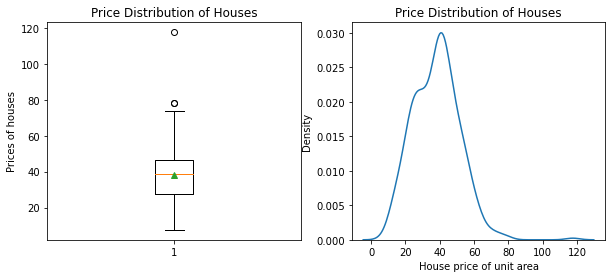

In [10]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].boxplot(x=y,showmeans=True);
ax[0].set_title("Price Distribution of Houses");
ax[0].set_ylabel("Prices of houses");
sns.kdeplot(x=y,ax=ax[1]);
ax[1].set_title("Price Distribution of Houses");

In [11]:
y.mean(), y.median()

(37.98019323671498, 38.45)

The distribution seems to be slightly right skewed,due to the two outlers ,but the mean and meadian are quite same so we can consider it as symmetric. We will later see if the variables are only outliers or influential as well. If influencial we will remove.

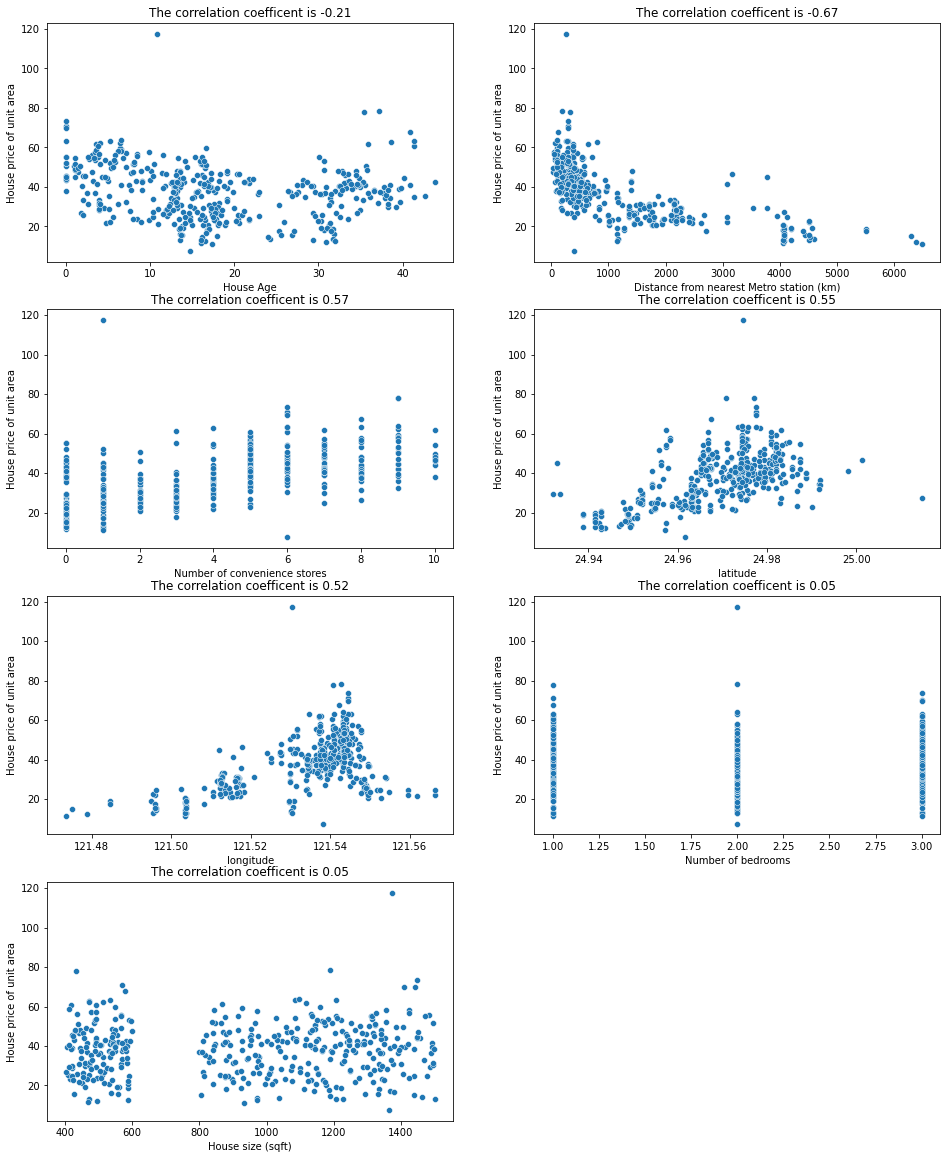

In [12]:
columns = X.columns 
count = 1
plt.figure(figsize=(16,36))
p = int(len(columns)+1/2)
for column in columns:
    plt.subplot(p,2,count)
    sns.scatterplot(x= df.loc[:,column], y = y)
    plt.title(f"The correlation coefficent is {np.round(np.corrcoef(df.loc[:,column],y)[1][0],2)}");
    count = count +1

From the plot it seems that there is some missing values for the vaiable _House size (sqft)_ . Indicating that the ddata needs to be scurtinized. 

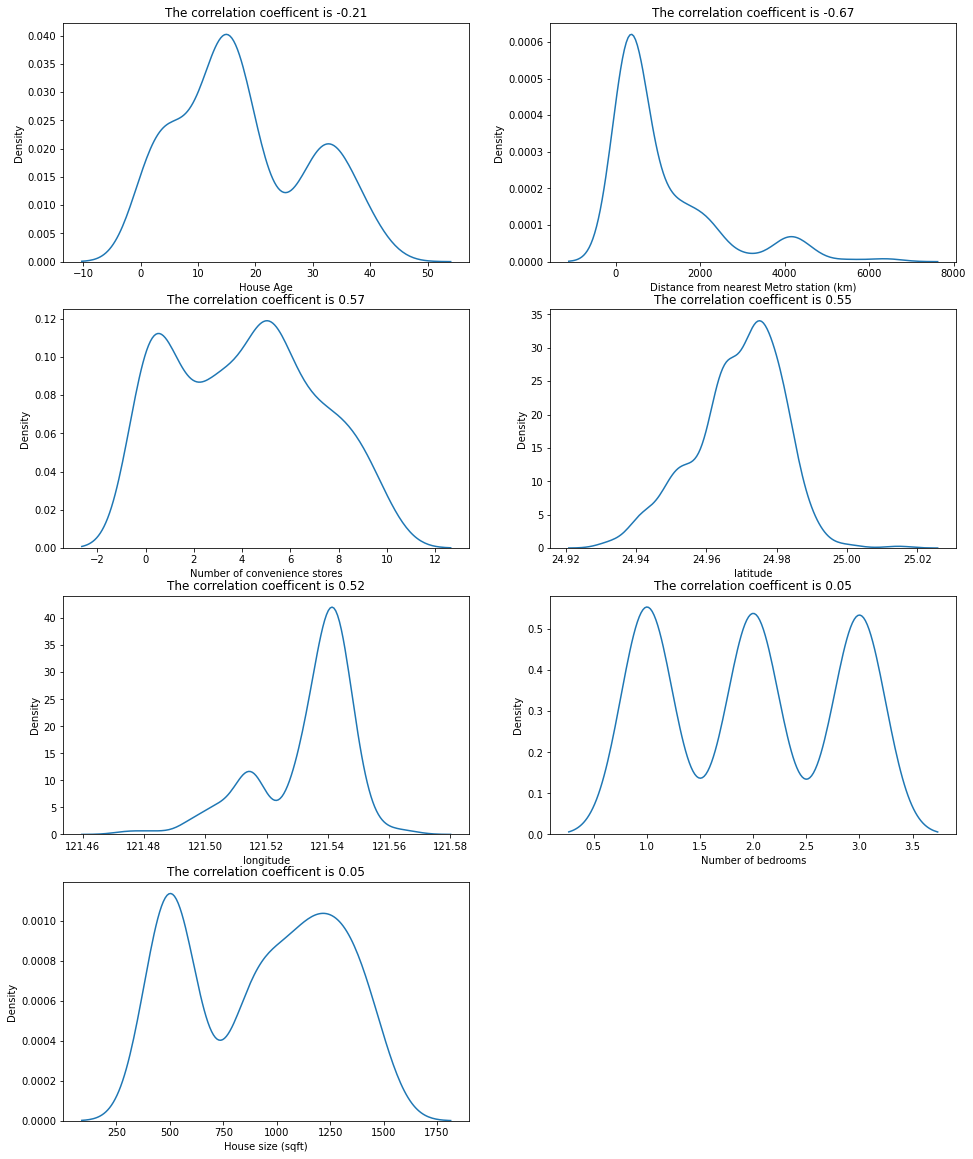

In [13]:
columns = X.columns 
count = 1
plt.figure(figsize=(16,36))
p = int(len(columns)+1/2)
for column in columns:
    plt.subplot(p,2,count)
    sns.kdeplot(x= df.loc[:,column])
    plt.title(f"The correlation coefficent is {np.round(np.corrcoef(df.loc[:,column],y)[1][0],2)}");
    count = count +1

All the vaiables seem to have a fair correlation with our target value field, except for *No. of Bedrooms* and *House Size (sqft)* 

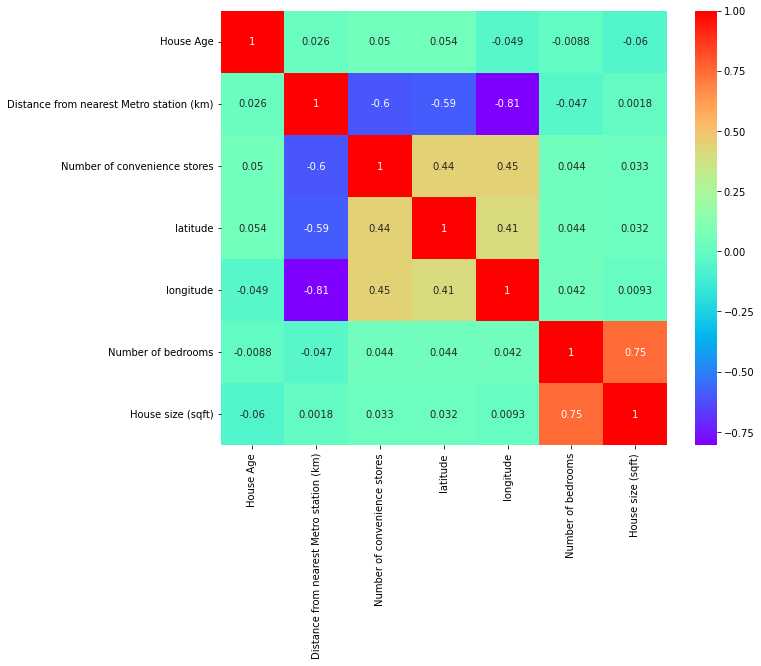

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap = "rainbow");

With the help of heatmap we try to understand the correlation between the variables.
We see that Longitude and Distance from nearest Metro station (km). we wil study this later.

# Full Model

In [15]:
X.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,32.0,84.87882,10,24.98298,121.54024,1,575
1,19.5,306.59470,9,24.98034,121.53951,2,1240
2,13.3,561.98450,5,24.98746,121.54391,3,1060
3,13.3,561.98450,5,24.98746,121.54391,2,875
4,5.0,390.56840,5,24.97937,121.54245,1,491


In [16]:
X = sm.add_constant(X)

C:\Users\sauga\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
Mdl = sm.OLS(y,X).fit()
print(Mdl.summary())

                               OLS Regression Results                               
Dep. Variable:     House price of unit area   R-squared:                       0.572
Model:                                  OLS   Adj. R-squared:                  0.564
Method:                       Least Squares   F-statistic:                     77.37
Date:                      Sun, 27 Nov 2022   Prob (F-statistic):           8.50e-71
Time:                              00:15:12   Log-Likelihood:                -1492.3
No. Observations:                       414   AIC:                             3001.
Df Residuals:                           406   BIC:                             3033.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

From the summary statistics we see that the variables longitude, House size (sqrft) and House Size (sqft) are insignificant.
We should drop them in the next model, but according to the subject matter we *_can't remove it_* as it coplies with the subject matter to well. So we are dropping longitude only
We see the correlation betwwen the predicted and obseved values to measure the  accuracy which is *_76%_* and the adjusted R2 value is also *_56.4%_* indicating a moderate fit of the model.

In [18]:
X["Predicted"] = Mdl.predict(X)
X["Error"] = Mdl.resid

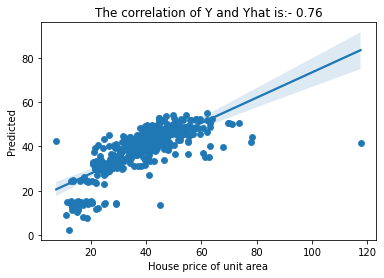

In [19]:
sns.scatterplot(x= y, y=X.Predicted)
sns.regplot(x= y, y=X.Predicted)
plt.title(f"The correlation of Y and Yhat is:- {np.round(np.corrcoef(y,X.Predicted)[1][0],2)}");

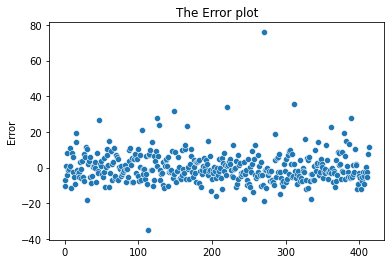

In [20]:
sns.scatterplot(x= range(len(X)), y=X.Error)
plt.title(f"The Error plot");

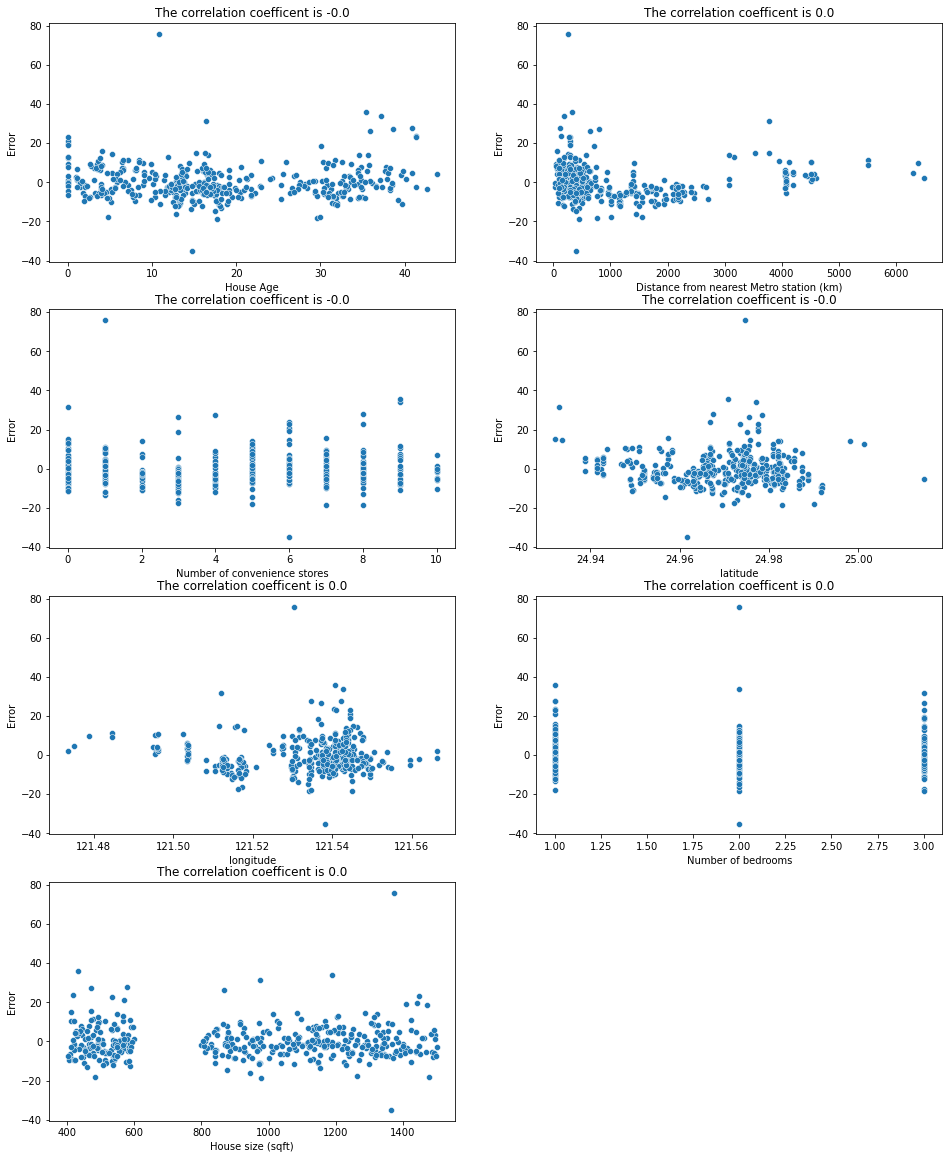

In [21]:
columns = X.columns
columns = columns.drop(["const","Error","Predicted"])
count = 1
plt.figure(figsize=(16,36))
for column in columns:
    plt.subplot(int(len(columns)+1/2),2,count)
    sns.scatterplot(x= X.loc[:,column], y = X.loc[:,"Error"])
    plt.title(f"The correlation coefficent is {np.round(np.corrcoef(X[column],X.Error)[1][0],2)}");
    count = count +1

In [22]:
influence = Mdl.get_influence()
sm_fr = influence.summary_frame()
standard_resid =sm_fr.standard_resid
Pii = sm_fr.hat_diag
Potential_fn =[]
for i in range(len(Pii)):
    Potential_fn.append(Pii[i]/(1-Pii[i]))

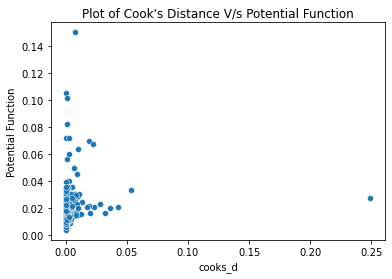

In [23]:
sns.scatterplot(x = sm_fr.cooks_d,y = Potential_fn)
plt.ylabel("Potential Function")
plt.title("Plot of Cook's Distance V/s Potential Function")
plt.show()

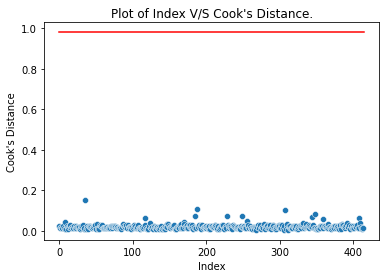

In [24]:
import scipy.stats as stats
FScore = stats.f.ppf(q=.95,dfn=(len(columns)+1),dfd=(len(df)-len(columns)-1))
sns.scatterplot(x = range(len(Potential_fn)),y = Potential_fn)
plt.plot([0,int(len(Potential_fn))],[(FScore/2),(FScore/2)], color ='r')
plt.ylabel("Cook's Distance")
plt.xlabel("Index")
plt.title("Plot of Index V/S Cook's Distance.")
plt.show()

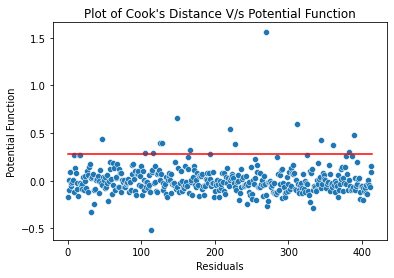

In [25]:
cv = 2*(np.sqrt((len(columns)+1)/(len(Potential_fn)-len(columns)-1)))
sns.scatterplot(x = range(0,len(Potential_fn)),y = sm_fr.dffits)
plt.plot([0,int(len(Potential_fn))],[(cv),(cv)], color ='r')
plt.ylabel("Potential Function")
plt.xlabel("Residuals")
plt.title("Plot of Cook's Distance V/s Potential Function")
plt.show()

### Clearly we are able to see the only Influential point whose index is described below.

In [26]:
print(f"Influential Point from Cooks_distance index:-{np.argmax(sm_fr.cooks_d)}, and value {max(sm_fr.cooks_d)}, value of House Price in the Index {y[np.argmax(sm_fr.cooks_d)]}")
print(f"Influential Point from DFFITS index:-{np.argmax(sm_fr.dffits)}, and value {max(sm_fr.dffits)}, value of House Price in the Index {y[np.argmax(sm_fr.dffits)]}")

Influential Point from Cooks_distance index:-270, and value 0.2490997162892218, value of House Price in the Index 117.5
Influential Point from DFFITS index:-270, and value 1.557597947823952, value of House Price in the Index 117.5


In [27]:
def inxrest(df,val):
    df = df.drop(val)
    df = df.reset_index()
    df = df.drop("index",axis=1)
    return df
X = inxrest(X,270)
y = inxrest(y,270)
df = inxrest(df,270)

In [28]:
X = df
X = sm.add_constant(X)
Mdl = sm.OLS(y,X).fit()
print(Mdl.summary())

                               OLS Regression Results                               
Dep. Variable:     House price of unit area   R-squared:                       0.617
Model:                                  OLS   Adj. R-squared:                  0.611
Method:                       Least Squares   F-statistic:                     93.29
Date:                      Sun, 27 Nov 2022   Prob (F-statistic):           1.92e-80
Time:                              00:15:14   Log-Likelihood:                -1448.0
No. Observations:                       413   AIC:                             2912.
Df Residuals:                           405   BIC:                             2944.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\sauga\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### So we see, that dropping the influential point increases the model fit to a great extend ie from *56%* to _61%_  .

In [29]:
X["Predicted"] = Mdl.predict(X)
X["Error"] = Mdl.resid
y = y["House price of unit area"]

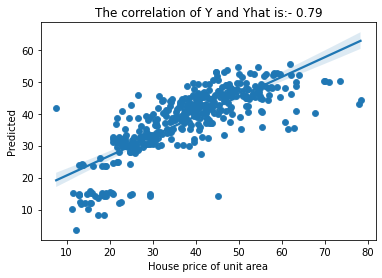

In [30]:
sns.scatterplot(x= y, y=X.Predicted)
sns.regplot(x= y, y=X.Predicted)
plt.title(f"The correlation of Y and Yhat is:- {np.round(np.corrcoef(y,X.Predicted)[1][0],2)}");

## Accuracy also seems to increase by 3% after the most influential observation in dropped.

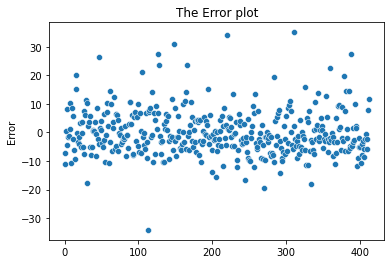

In [31]:
sns.scatterplot(x= range(len(X)), y=X.Error)
plt.title(f"The Error plot");

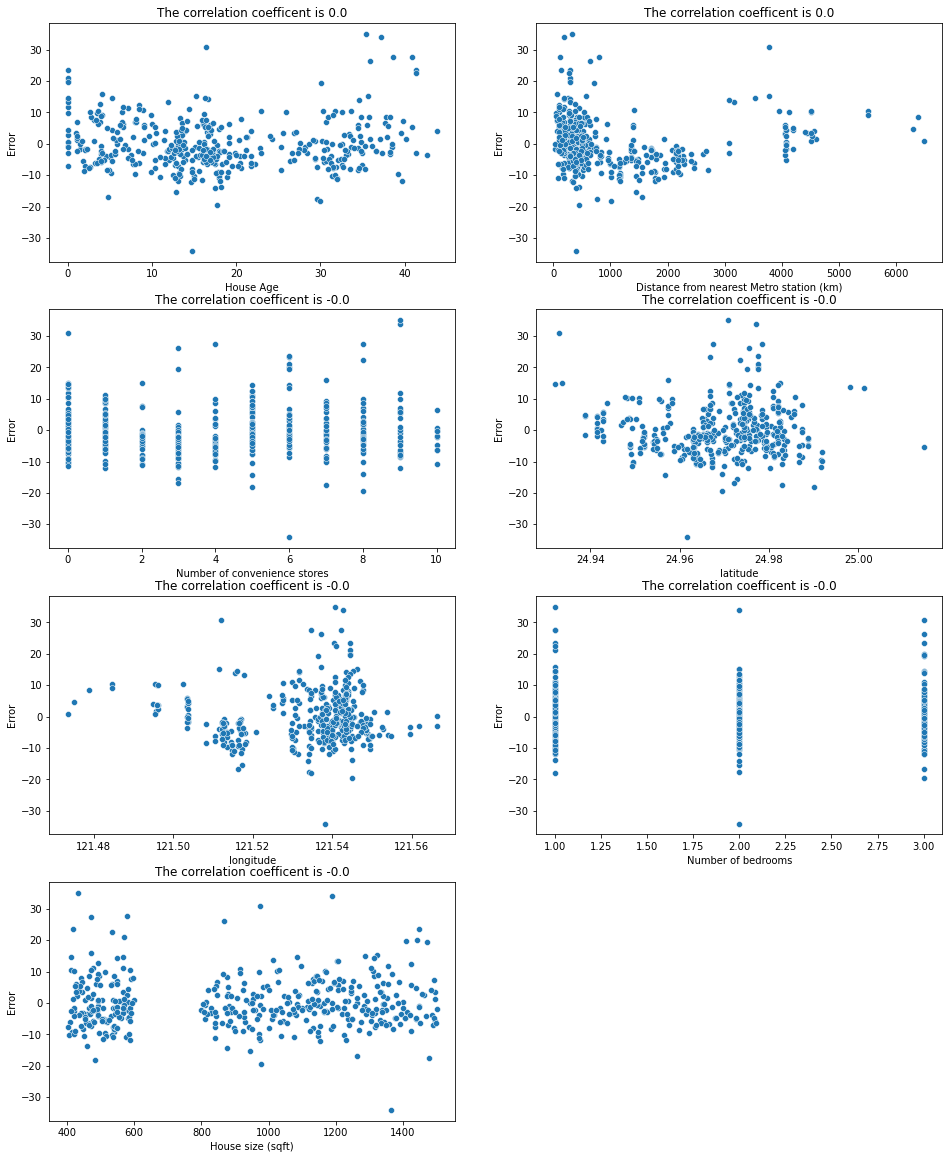

In [32]:
columns = X.columns
columns = columns.drop(["const","Error","Predicted"])
count = 1
plt.figure(figsize=(16,36))
for column in columns:
    plt.subplot(int(len(columns)+1/2),2,count)
    sns.scatterplot(x= X.loc[:,column], y = X.loc[:,"Error"])
    plt.title(f"The correlation coefficent is {np.round(np.corrcoef(X[column],X.Error)[1][0],2)}");
    count = count +1

In [33]:
influence = Mdl.get_influence()
sm_fr = influence.summary_frame()
standard_resid =sm_fr.standard_resid
Pii = sm_fr.hat_diag
Potential_fn =[]
for i in range(len(Pii)):
    Potential_fn.append(Pii[i]/(1-Pii[i]))

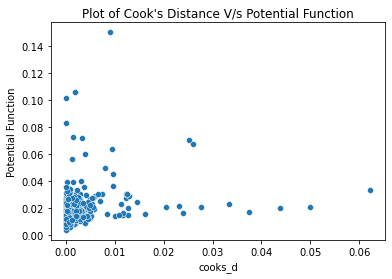

In [34]:
sns.scatterplot(x = sm_fr.cooks_d,y = Potential_fn)
plt.ylabel("Potential Function")
plt.title("Plot of Cook's Distance V/s Potential Function")
plt.show()

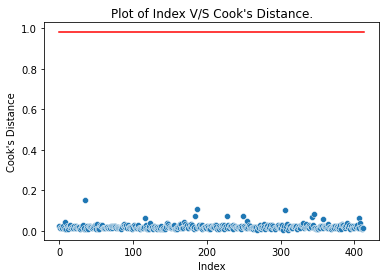

In [35]:
FScore = stats.f.ppf(q=.95,dfn=(len(columns)+1),dfd=(len(df)-len(columns)-1))
sns.scatterplot(x = range(len(Potential_fn)),y = Potential_fn)
plt.plot([0,int(len(Potential_fn))],[(FScore/2),(FScore/2)], color ='r')
plt.ylabel("Cook's Distance")
plt.xlabel("Index")
plt.title("Plot of Index V/S Cook's Distance.")
plt.show()

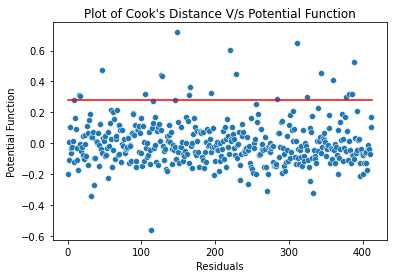

In [36]:
cv = 2*(np.sqrt((len(columns)+1)/(len(Potential_fn)-len(columns)-1)))
sns.scatterplot(x = range(0,len(Potential_fn)),y = sm_fr.dffits)
plt.plot([0,int(len(Potential_fn))],[(cv),(cv)], color ='r')
plt.ylabel("Potential Function")
plt.xlabel("Residuals")
plt.title("Plot of Cook's Distance V/s Potential Function")
plt.show()

In [37]:
X = X.drop(["const","Error","Predicted"], axis=1)
VIF = pd.Series([variance_inflation_factor(X.values,i)
         for i in range(X.shape[1])],
         index =  X.columns)
print(VIF)

House Age                                   3.497924e+00
Distance from nearest Metro station (km)    3.010008e+00
Number of convenience stores                4.786478e+00
latitude                                    5.911932e+06
longitude                                   5.911230e+06
Number of bedrooms                          1.612037e+01
House size (sqft)                           1.912001e+01
dtype: float64


All model Digosnostics look good, as there is no anormality seen in the error plots.
In the variace Inflation factor we see that the value of _Distance from nearest Metro station (km)_ is quite high that can be due to the reason that there was high correlation of _Distance from nearest Metro station (km)_ with _longitude_. So dropping one variable that is longitude might change that as well.

# Model After Dropping Longitude

In [38]:
X = df
X = X.drop(["longitude"],axis=1)
X = sm.add_constant(X)

C:\Users\sauga\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [39]:
Mdl = sm.OLS(y,X).fit()
print(Mdl.summary())

                               OLS Regression Results                               
Dep. Variable:     House price of unit area   R-squared:                       0.617
Model:                                  OLS   Adj. R-squared:                  0.611
Method:                       Least Squares   F-statistic:                     109.0
Date:                      Sun, 27 Nov 2022   Prob (F-statistic):           1.96e-81
Time:                              00:15:16   Log-Likelihood:                -1448.1
No. Observations:                       413   AIC:                             2910.
Df Residuals:                           406   BIC:                             2938.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [40]:
X["Predicted_2"] = Mdl.predict(X)
X["Error_2"] = Mdl.resid

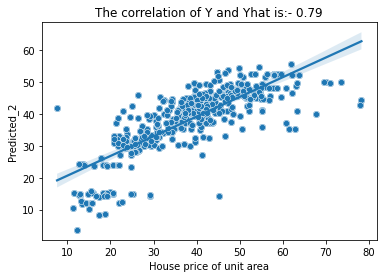

In [41]:
sns.regplot(x= y, y=X.Predicted_2)
sns.scatterplot(x= y, y=X.Predicted_2)
plt.title(f"The correlation of Y and Yhat is:- {np.round(np.corrcoef(y,X.Predicted_2)[1][0],2)}");

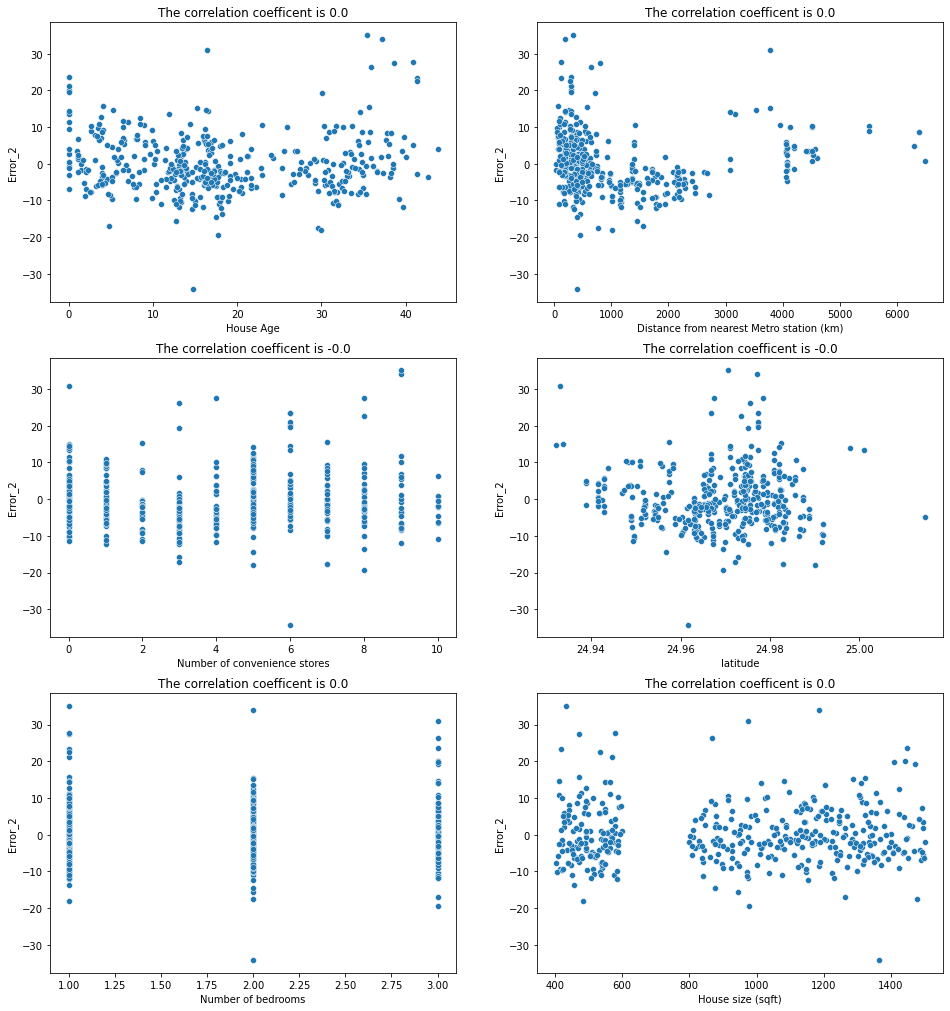

In [42]:
columns = X.columns
columns = columns.drop(["const","Error_2","Predicted_2"])
count = 1
plt.figure(figsize=(16,36))
for column in columns:
    plt.subplot(int(len(columns)+1/2),2,count)
    sns.scatterplot(x= X.loc[:,column], y = X.loc[:,"Error_2"])
    plt.title(f"The correlation coefficent is {np.round(np.corrcoef(X[column],X.Error_2)[1][0],2)}");
    count = count +1

In [43]:
X = X.drop(["const","Error_2","Predicted_2"], axis=1)
VIF = pd.Series([variance_inflation_factor(X.values,i)
         for i in range(X.shape[1])],
         index =  X.columns)
print(VIF)

House Age                                    3.473676
Distance from nearest Metro station (km)     2.780138
Number of convenience stores                 4.695762
latitude                                    16.791678
Number of bedrooms                          16.117271
House size (sqft)                           19.100863
dtype: float64


So after dropping longitude we see that there is no change in the _Accuracy_ and the summary statistics is also significant 
except, Number of bedrooms , House size (sqft), as it looks from the summary that the variables are insignificant.
There is no problem in the error plots, and the VIF has no problem here as well so: 
#### We *can* take take this model as the final Model.

Dropping Number of bedrooms , House size (sqft) as it looks from the summary that the variables are insignificant. Even before we have seen there is no correlation with the house price with this two variables. So just trying to see the model after dropping.

In [44]:
X = df
X = X.drop(["Number of bedrooms","longitude","House size (sqft)"],axis=1)
X = sm.add_constant(X)

C:\Users\sauga\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [45]:
Mdl = sm.OLS(y,X).fit()
print(Mdl.summary())

                               OLS Regression Results                               
Dep. Variable:     House price of unit area   R-squared:                       0.617
Model:                                  OLS   Adj. R-squared:                  0.613
Method:                       Least Squares   F-statistic:                     164.2
Date:                      Sun, 27 Nov 2022   Prob (F-statistic):           1.34e-83
Time:                              00:15:17   Log-Likelihood:                -1448.2
No. Observations:                       413   AIC:                             2906.
Df Residuals:                           408   BIC:                             2927.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [46]:
X["Predicted_3"] = Mdl.predict(X)
X["Error_3"] = Mdl.resid

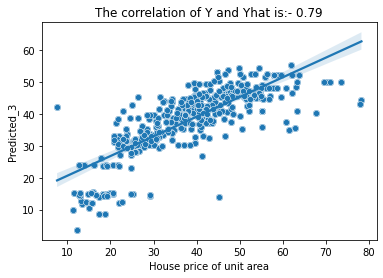

In [47]:
sns.regplot(x= y, y=X.Predicted_3)
sns.scatterplot(x= y, y=X.Predicted_3)
plt.title(f"The correlation of Y and Yhat is:- {np.round(np.corrcoef(y,X.Predicted_3)[1][0],2)}");

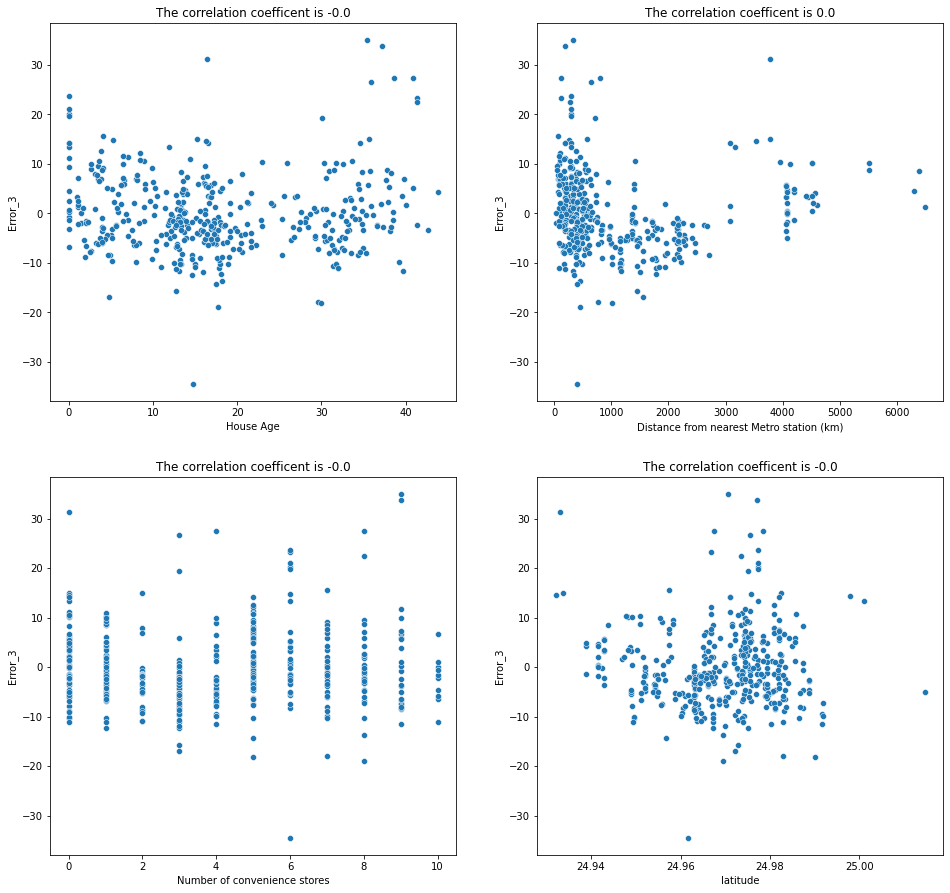

In [48]:
columns = X.columns
columns = columns.drop(["const","Error_3","Predicted_3"])
count = 1
plt.figure(figsize=(16,32))
for column in columns:
    plt.subplot(int(len(columns)+1/2),2,count)
    sns.scatterplot(x= X.loc[:,column], y = X.loc[:,"Error_3"])
    plt.title(f"The correlation coefficent is {np.round(np.corrcoef(X[column],X.Error_3)[1][0],2)}");
    count = count +1

In [49]:
X = X.drop(["const","Error_3","Predicted_3"], axis=1)
VIF = pd.Series([variance_inflation_factor(X.values,i)
         for i in range(X.shape[1])],
         index =  X.columns)
print(VIF)

House Age                                   3.448036
Distance from nearest Metro station (km)    2.758315
Number of convenience stores                4.677542
latitude                                    9.352033
dtype: float64


#### From the different models we see that there is a slight increase in the R2 value and all the parameters seem to have a significant impact in the model. But there is no increase in the accuracy of the model which still stands at 79%. Further excluding more variables seems to increase the Multicollinearity and the variables of our interest are alsso lost with no increase in accuracy.
### Hence we might use the full model after removing the outlier, as our final model,as it goes best with the subject matter.

## Code for Final Model.

In [50]:
y = df_rw["House price of unit area"]
df = df_rw.drop(["Transaction date","House price of unit area"],axis=1)

#Dropping the influential point described earlier.
def inxrest(df,val):
    df = df.drop(val)
    df = df.reset_index()
    df = df.drop("index",axis=1)
    return df
X = inxrest(X,270)
y = inxrest(y,270)
df = inxrest(df,270)

# Creating X from data given
X = df
X = sm.add_constant(X)
Mdl_fnl = sm.OLS(y,X).fit()
print(Mdl_fnl.summary())

                               OLS Regression Results                               
Dep. Variable:     House price of unit area   R-squared:                       0.617
Model:                                  OLS   Adj. R-squared:                  0.611
Method:                       Least Squares   F-statistic:                     93.29
Date:                      Sun, 27 Nov 2022   Prob (F-statistic):           1.92e-80
Time:                              00:15:18   Log-Likelihood:                -1448.0
No. Observations:                       413   AIC:                             2912.
Df Residuals:                           405   BIC:                             2944.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\sauga\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [53]:
!git remote add origin https://github.com/SaugataOctavious09/AssignmentInternship1.git
!git branch -M main
!git push -u origin main

'git' is not recognized as an internal or external command,
operable program or batch file.
'git' is not recognized as an internal or external command,
operable program or batch file.
'git' is not recognized as an internal or external command,
operable program or batch file.
